<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    
</div>


# Machine Learning Avanzado: Laboratorio 02

<br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Profesor: Tomás Fontecilla </em><br>
    
**Nombre Estudiante(s)**:  
- Cesar Soto
- Cristhian Solís
- Cristian Vasquez


### Objetivo:
Comparar un modelo de perceptron multicapa con uno realizado con convolución

### Marco metodológico

En el marco de este laboratorio, se desarrollaron actividades secuenciales que determinaron el marco metodológico guiando el desarrollo del laboratorio:
1. Carga de DF
2. Transformaciones
3. Desarrollo Modelo 1
4. Desarrollo Modelo 2
5. Comparación
6. Conclusiones

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter



In [45]:
# Rutas a las carpetas de entrenamiento y prueba
train_dir = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\04_Machine_Learning\Laboratorios\Data\archive (6)\train'
test_dir = r'C:\Users\csolis\OneDrive - Nutreco Nederland B.V\Documents\DOCUMENTOS PERSONALES\Estudio\04_Machine_Learning\Laboratorios\Data\archive (6)\test'

# Cargar el dataset de entrenamiento
batch_size = 32  # Número de imágenes por batch

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Redimensionar las imágenes
    label_mode='categorical',  # Etiquetas en formato categórico (one-hot)
    batch_size=batch_size  # Especificar el tamaño del batch
)

# Cargar el dataset de prueba
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),  # Redimensionar las imágenes
    label_mode='categorical',  # Etiquetas en formato categórico (one-hot)
    batch_size=batch_size  # Especificar el tamaño del batch
)

# Verificar el tamaño de los batches para train y test
for images, labels in train_dataset.take(1):  # Tomar el primer batch del conjunto de entrenamiento
    print(f"Imágenes en el batch de entrenamiento: {images.shape}")
    print(f"Etiquetas en el batch de entrenamiento: {labels.shape}")

for images, labels in test_dataset.take(1):  # Tomar el primer batch del conjunto de prueba
    print(f"Imágenes en el batch de prueba: {images.shape}")
    print(f"Etiquetas en el batch de prueba: {labels.shape}")


Found 4733 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.
Imágenes en el batch de entrenamiento: (32, 224, 224, 3)
Etiquetas en el batch de entrenamiento: (32, 2)
Imágenes en el batch de prueba: (32, 224, 224, 3)
Etiquetas en el batch de prueba: (32, 2)


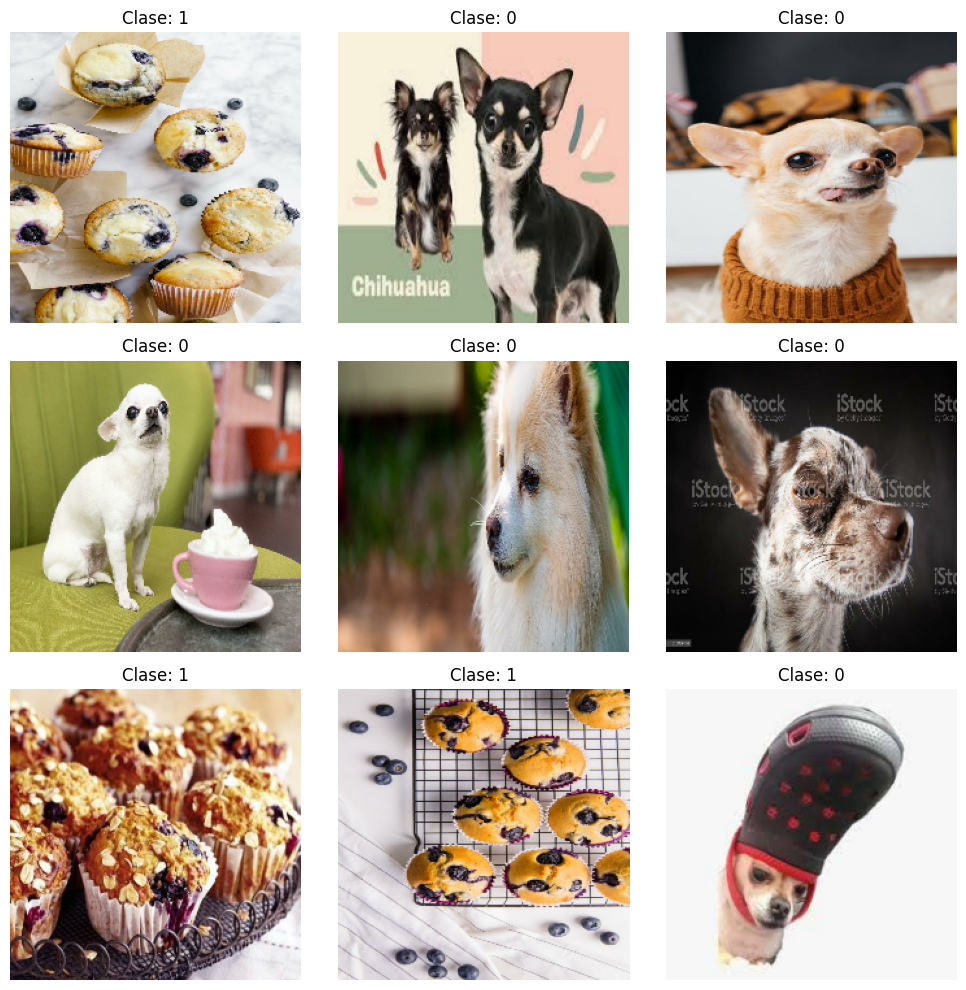

In [7]:
# Tomar un solo batch
sample_images, sample_labels = next(iter(train_dataset))

# Mostrar las primeras 9 imágenes del batch
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].numpy().astype("uint8"))
    
    # Obtener el índice de la clase (si las etiquetas son one-hot encoded)
    class_idx = int(tf.argmax(sample_labels[i]).numpy())  # Usar tf.argmax para obtener el índice
    plt.title(f"Clase: {class_idx}")
    plt.axis('off')

plt.tight_layout()
plt.show()


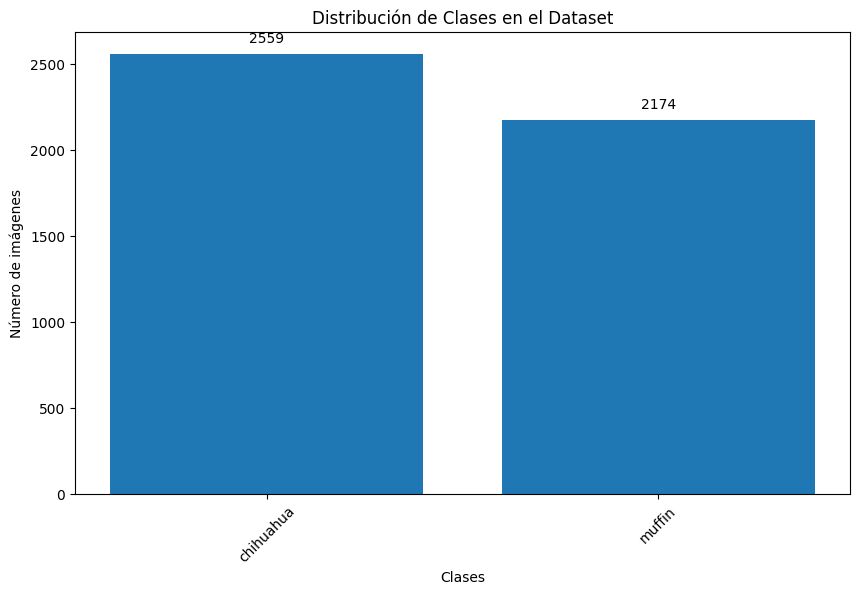

In [8]:

# Contar la cantidad de imágenes por clase
class_names = train_dataset.class_names

# Crear una lista para los índices de clase (no one-hot)
class_indices = []

# Iterar sobre el dataset para extraer las etiquetas y obtener los índices de clase
for _, labels in train_dataset:
    # Convertir las etiquetas one-hot a índice de clase usando tf.argmax
    class_indices.extend(tf.argmax(labels, axis=-1).numpy())  # Añadir los índices a la lista

# Contar la frecuencia de cada clase
class_counts = Counter(class_indices)

# Graficar la distribución de clases
plt.figure(figsize=(10, 6))
bars = plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])

# Añadir los totales sobre las barras
for bar, count in zip(bars, [class_counts[i] for i in range(len(class_names))]):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, str(count), ha='center', va='bottom', fontsize=10)

plt.xlabel('Clases')
plt.ylabel('Número de imágenes')
plt.title('Distribución de Clases en el Dataset')
plt.xticks(rotation=45)
plt.show()


In [9]:
# Verificar el formato de las etiquetas
for _, labels in train_dataset.take(1):
    print(labels.numpy())  # Imprime las etiquetas one-hot


[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


Red Neuronal Convolucional (CNN)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Capa de entrada
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='softmax')  # Salida con 2 clases
])


c:\Users\csolis\AppData\Local\anaconda3\envs\mi_entorno\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
# Compilar el modelo
model.compile(
    optimizer='adam',                   # Optimizador Adam
    loss='categorical_crossentropy',     # Función de pérdida para clasificación multiclase
    metrics=['accuracy']                # Métrica de precisión
)

In [12]:
# Entrenamiento del modelo

epochs = 10  # Número de épocas para entrenar el modelo
model.fit(
    train_dataset,  # Usar el dataset completo de entrenamiento
    epochs=epochs,  # Número de épocas (iteraciones completas sobre todo el dataset)
    verbose=1,      # Muestra el progreso del entrenamiento
    validation_data=test_dataset  # Datos para validación durante el entrenamiento
)


Epoch 1/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 36s 235ms/step - accuracy: 0.5980 - loss: 1442.8910 - val_accuracy: 0.7399 - val_loss: 6.0505
Epoch 2/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 206ms/step - accuracy: 0.8374 - loss: 2.5479 - val_accuracy: 0.7542 - val_loss: 3.9070
Epoch 3/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 206ms/step - accuracy: 0.9342 - loss: 0.4538 - val_accuracy: 0.7601 - val_loss: 3.5695
Epoch 4/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 32s 214ms/step - accuracy: 0.9763 - loss: 0.1309 - val_accuracy: 0.7635 - val_loss: 3.5058
Epoch 5/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 207ms/step - accuracy: 0.9924 - loss: 0.0457 - val_accuracy: 0.7644 - val_loss: 3.3877
Epoch 6/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 211ms/step - accuracy: 0.9977 - loss: 0.0169 - val_accuracy: 0.7551 - val_loss: 3.3543
Epoch 7/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 206ms/step - accuracy: 0.9991 - loss: 0.0100 - val_accuracy: 0.7559 - val_loss: 3.3677
Epoch 8/10
148/148 ━━━━━━━━━━━━━━━━━━━━ 31s 210ms/step - accuracy: 1.0000 - loss

In [13]:
# Evaluar el modelo en el conjunto de prueba
score = model.evaluate(test_dataset, verbose=1)

# Imprimir los resultados
print('Test loss:', score[0])  # Pérdida en el conjunto de prueba
print('Test accuracy:', score[1])  # Precisión en el conjunto de prueba


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.7652 - loss: 2.7975
Test loss: 3.421673059463501
Test accuracy: 0.7592905163764954


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


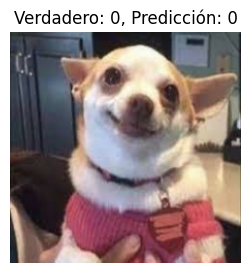

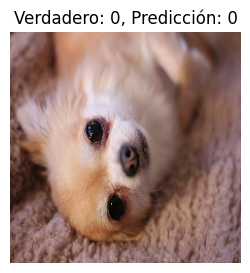

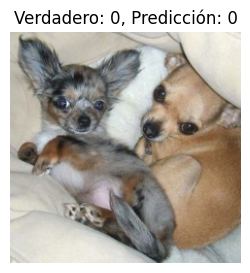

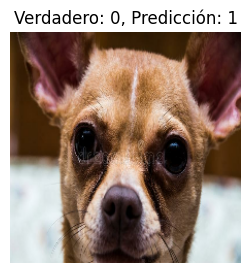

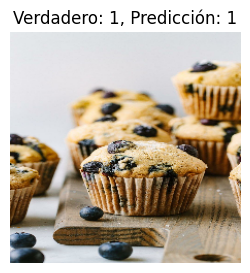

In [14]:
# Obtener las imágenes y las etiquetas verdaderas
images, labels = next(iter(test_dataset))

# Hacer predicciones sobre el batch de imágenes
predictions = model.predict(images)
predicted_classes = np.argmax(predictions, axis=1)  # Obtener las clases predichas

# Obtener las clases verdaderas del conjunto de prueba
true_classes = np.argmax(labels.numpy(), axis=1)

# Mostrar las primeras 5 imágenes con sus etiquetas verdaderas y predichas
for i in range(5):
    plt.figure(figsize=(3, 3))
    
    # Mostrar la imagen
    plt.imshow(images[i].numpy().astype("uint8"))
    
    # Título con las etiquetas
    plt.title(f"Verdadero: {true_classes[i]}, Predicción: {predicted_classes[i]}")
    
    plt.axis('off')  # Sin ejes
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━

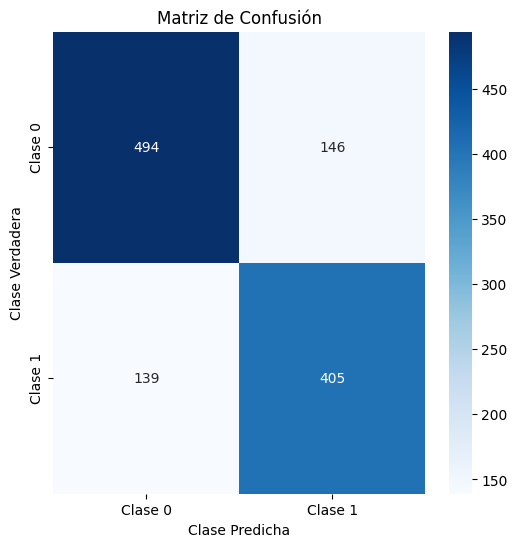

In [15]:
# Inicializar listas para almacenar las clases verdaderas y predichas
true_classes = []
predicted_classes = []

# Iterar sobre el conjunto de datos de prueba
for images, labels in test_dataset:
    # Hacer predicciones sobre el batch de imágenes
    predictions = model.predict(images)
    predicted_classes.extend(np.argmax(predictions, axis=1))  # Acumular las predicciones
    true_classes.extend(np.argmax(labels, axis=1))  # Acumular las etiquetas verdaderas

# Generar la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.ylabel("Clase Verdadera")
plt.xlabel("Clase Predicha")
plt.title("Matriz de Confusión")
plt.show()



MLP

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Crear el modelo MLP
model_mlp = models.Sequential([
    # Aplanar las imágenes 224x224x3 a un vector
    layers.Flatten(input_shape=(224, 224, 3)),
    
    # Primera capa densa con 512 neuronas y activación ReLU
    layers.Dense(512, activation='relu'),
    
    # Segunda capa densa con 128 neuronas y activación ReLU
    layers.Dense(128, activation='relu'),
    
    # Capa de salida con 2 neuronas (para 2 clases) y activación softmax
    layers.Dense(2, activation='softmax')
])

# Compilar el modelo
model_mlp.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Para clasificación multiclase
                  metrics=['accuracy'])

# Resumen del modelo
model_mlp.summary()


c:\Users\csolis\AppData\Local\anaconda3\envs\mi_entorno\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    77,070,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,136,770 (294.25 MB)

 Trainable params: 77,136,770 (294.25 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Entrenar el modelo
history_mlp = model_mlp.fit(
    train_dataset,  # Conjunto de entrenamiento
    validation_data=test_dataset,  # Conjunto de prueba
    epochs=10,  # Número de épocas
    verbose=2  # Imprimir progreso
)


Epoch 1/10
148/148 - 123s - 834ms/step - accuracy: 0.5732 - loss: 3136.8140 - val_accuracy: 0.6495 - val_loss: 766.9150
Epoch 2/10
148/148 - 113s - 762ms/step - accuracy: 0.6146 - loss: 914.8035 - val_accuracy: 0.5819 - val_loss: 559.4890
Epoch 3/10
148/148 - 111s - 749ms/step - accuracy: 0.6649 - loss: 347.9179 - val_accuracy: 0.5769 - val_loss: 406.0036
Epoch 4/10
148/148 - 110s - 745ms/step - accuracy: 0.6588 - loss: 259.6920 - val_accuracy: 0.7095 - val_loss: 189.2415
Epoch 5/10
148/148 - 114s - 773ms/step - accuracy: 0.5874 - loss: 725.5773 - val_accuracy: 0.5490 - val_loss: 420.6410
Epoch 6/10
148/148 - 112s - 756ms/step - accuracy: 0.6740 - loss: 57.2097 - val_accuracy: 0.7356 - val_loss: 13.3176
Epoch 7/10
148/148 - 112s - 758ms/step - accuracy: 0.7040 - loss: 13.1841 - val_accuracy: 0.7382 - val_loss: 7.0466
Epoch 8/10
148/148 - 111s - 752ms/step - accuracy: 0.7160 - loss: 5.8425 - val_accuracy: 0.7052 - val_loss: 6.7889
Epoch 9/10
148/148 - 112s - 759ms/step - accuracy: 0.734

In [48]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model_mlp.evaluate(test_dataset, verbose=2)

print(f"\nPrecisión en el conjunto de prueba: {test_acc * 100:.2f}%")


37/37 - 4s - 104ms/step - accuracy: 0.7416 - loss: 2.1384

Precisión en el conjunto de prueba: 74.16%


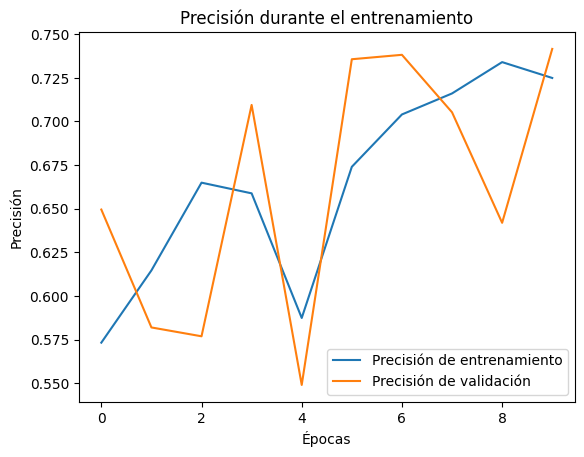

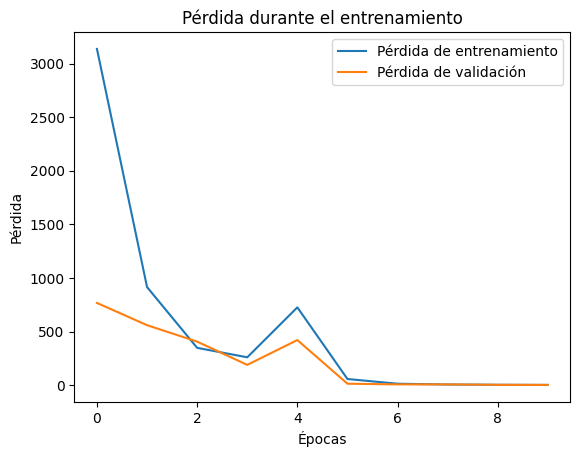

In [49]:
# Graficar precisión de entrenamiento y validación
plt.plot(history_mlp.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history_mlp.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar pérdida de entrenamiento y validación
plt.plot(history_mlp.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_mlp.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.title('Pérdida durante el entrenamiento')
plt.show()


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step


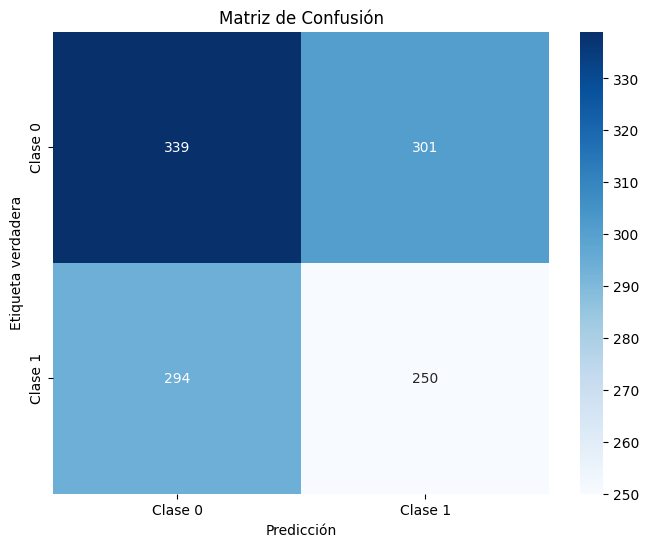

In [50]:
# Predecir etiquetas para el conjunto de prueba
y_pred_probs = model.predict(test_dataset)  # Probabilidades predichas
y_pred = np.argmax(y_pred_probs, axis=1)    # Convertir a etiquetas categóricas

# Extraer etiquetas reales del conjunto de prueba
y_true = np.concatenate([np.argmax(labels.numpy(), axis=1) for _, labels in test_dataset])

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Etiqueta verdadera")
plt.title("Matriz de Confusión")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


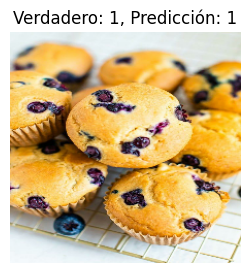

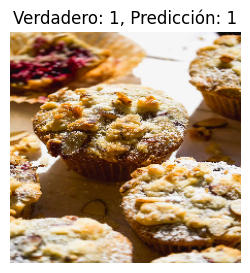

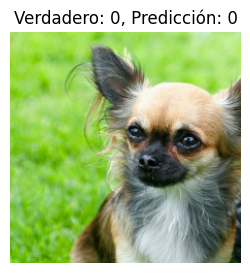

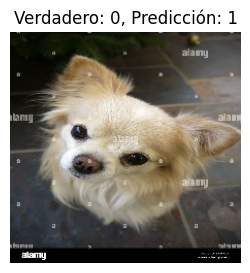

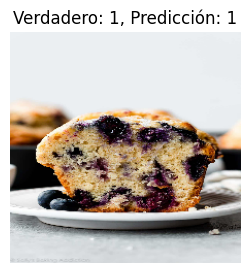

In [53]:
# Obtener las imágenes y las etiquetas verdaderas
images, labels = next(iter(test_dataset))

# Hacer predicciones sobre el batch de imágenes
predictions = model_mlp.predict(images)
predicted_classes = np.argmax(predictions, axis=1)  # Obtener las clases predichas

# Obtener las clases verdaderas del conjunto de prueba
true_classes = np.argmax(labels.numpy(), axis=1)

# Mostrar las primeras 5 imágenes con sus etiquetas verdaderas y predichas
for i in range(5):
    plt.figure(figsize=(3, 3))
    
    # Mostrar la imagen
    plt.imshow(images[i].numpy().astype("uint8"))
    
    # Título con las etiquetas
    plt.title(f"Verdadero: {true_classes[i]}, Predicción: {predicted_classes[i]}")
    
    plt.axis('off')  # Sin ejes
    plt.show()